In [4]:
import qnetvo as qnet
from context import src
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [5]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex):

    opt_dicts = []
    for i in range(1,7):

        file_regex = resource_regex + "_I_" + str(i) + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## broadcast Data Analysis

In [6]:
data_path = "../data/3-22-33_broadcast_violations/"

eacc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"eacc_bc_arb")
eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"eaqc_bc_arb")
earx_qc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"earx_qc_bc_arb")
gea3_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"gea3_bc_arb")
ghzacc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"ghzacc_bc_arb")
ghzaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"ghzaqc_bc_arb")
onesided_eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_arb")
onesided_eaqc_bc_sep_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_sep") # no entanglement is needed for max violation

onesided2_eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided2_eaqc_bc_arb")
qbc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"qbc_arb")




len(earx_qc_bc_arb_opt_dicts)

6

## Analyzing Data

In [7]:
broadcast_3_22_33_inequalities = src.bipartite_broadcast_bounds()[1:]


def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(3):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]


        max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound) / (qbound - cbound)] 
        

    return max_violations, qbounds, cbounds


eacc_bc_arb_max_violations, eacc_bc_arb_qbounds, eacc_bc_arb_cbounds = analyze_data(eacc_bc_arb_opt_dicts, broadcast_3_22_33_inequalities)
ghzacc_bc_arb_max_violations, ghzacc_bc_arb_qbounds, ghzacc_bc_arb_cbounds = analyze_data(ghzacc_bc_arb_opt_dicts, broadcast_3_22_33_inequalities)
ghzaqc_bc_arb_max_violations, ghzaqc_bc_arb_qbounds, ghzaqc_bc_arb_cbounds = analyze_data(ghzaqc_bc_arb_opt_dicts, broadcast_3_22_33_inequalities)
gea3_bc_arb_max_violations, gea3_bc_arb_qbounds, gea3_bc_arb_cbounds = analyze_data(gea3_bc_arb_opt_dicts, broadcast_3_22_33_inequalities)



onesided_eaqc_bc_arb_max_violations, onesided_eaqc_bc_arb_qbounds, onesided_eaqc_bc_arb_cbounds = analyze_data(onesided_eaqc_bc_arb_opt_dicts, broadcast_3_22_33_inequalities)
onesided_eaqc_bc_sep_max_violations, onesided_eaqc_bc_sep_qbounds, onesided_eaqc_bc_sep_cbounds = analyze_data(onesided_eaqc_bc_sep_opt_dicts, broadcast_3_22_33_inequalities)


onesided2_eaqc_bc_arb_max_violations, onesided2_eaqc_bc_arb_qbounds, onesided2_eaqc_bc_arb_cbounds = analyze_data(onesided2_eaqc_bc_arb_opt_dicts, broadcast_3_22_33_inequalities)


earx_qc_bc_arb_max_violations, earx_qc_bc_arb_qbounds, earx_qc_bc_arb_cbounds = analyze_data(earx_qc_bc_arb_opt_dicts, broadcast_3_22_33_inequalities)



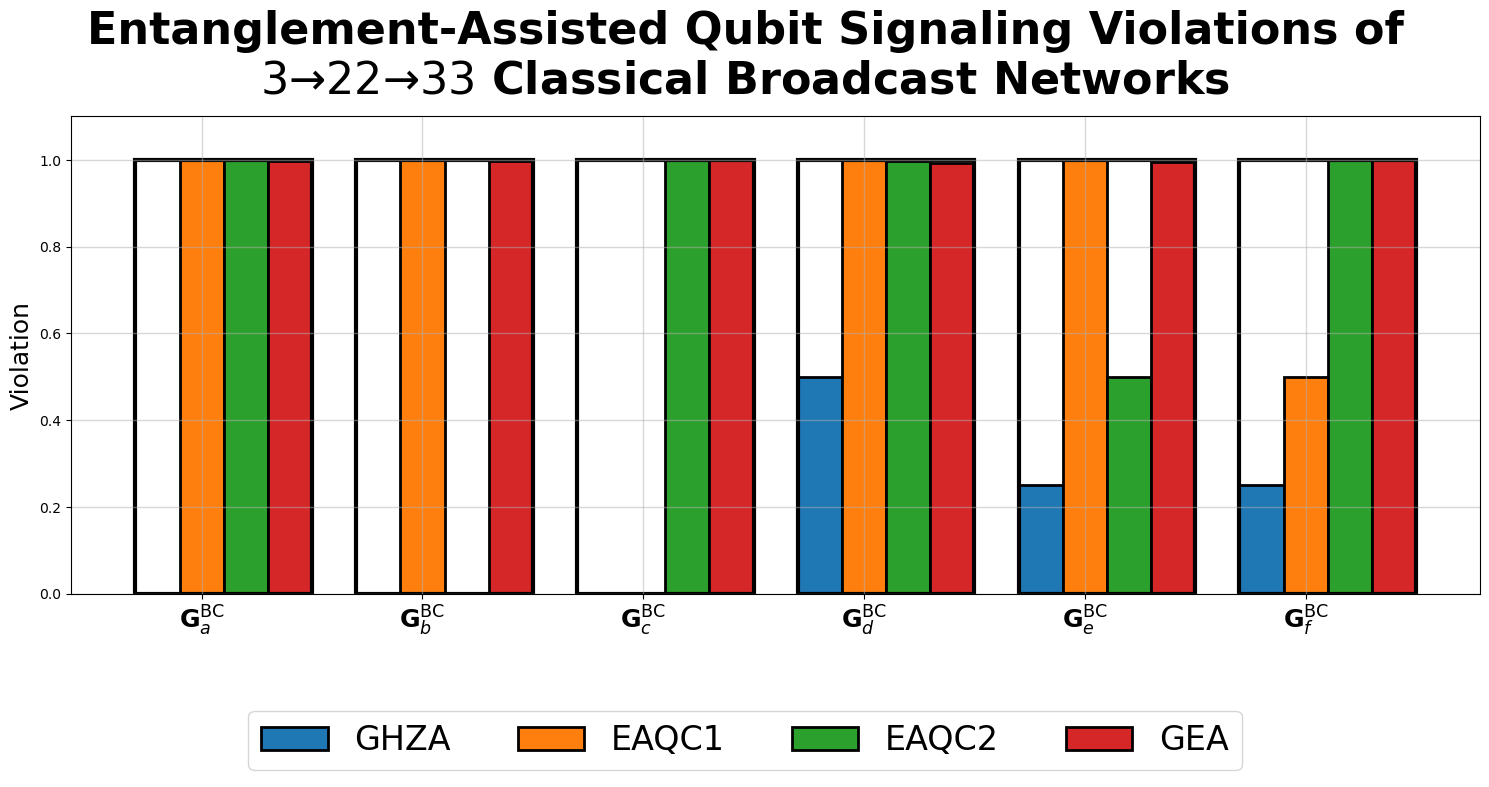

In [8]:
x_axis = np.arange(6)
x_labels = [
    r"$\mathbf{G}^{\rm{BC}}_{a}$",
    r"$\mathbf{G}^{\rm{BC}}_{b}$",
    r"$\mathbf{G}^{\rm{BC}}_{c}$",
    r"$\mathbf{G}^{\rm{BC}}_{d}$",    
    r"$\mathbf{G}^{\rm{BC}}_{e}$",
    r"$\mathbf{G}^{\rm{BC}}_{f}$",
]
width = 1/5

fig, ax1 = plt.subplots(figsize=(15, 8), ncols=1,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, ghzaqc_bc_arb_max_violations, width=width, label="GHZA", edgecolor="black",linewidth=2)

ax1.bar(x_axis+0*width, onesided_eaqc_bc_arb_max_violations, width=width, label="EAQC1", edgecolor="black",linewidth=2)

ax1.bar(x_axis+1*width, onesided2_eaqc_bc_arb_max_violations, width=width, label="EAQC2", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+1*width, eacc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+1*width, onesided_eaqc_bc_sep_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)


ax1.bar(x_axis+2*width, gea3_bc_arb_max_violations, width=width, label="GEA", edgecolor="black",linewidth=2)


# ax1.bar(x_axis+1*width, earx_qc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)



plt.figlegend(loc="lower center", ncols = 6, fontsize=24)


plt.bar(x_axis+0.5*width, [1]*len(broadcast_3_22_33_inequalities), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)

ax1.set_xticks(x_axis, x_labels, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Entanglement-Assisted Qubit Signaling Violations of\n" + r"$3\to 22\to 33$ Classical Broadcast Networks", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)

plt.show()